<a href="https://colab.research.google.com/github/banno-0720/learning_PyTorch/blob/main/hugging_face_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Overview

Welcome to the Learn Hugging Face Text Classificaiton project!

We’ll start with a text dataset, build a model to classify text samples and then share our model as a demo others can use.

To do so, we’ll be using a handful of helpful open-source tools from the Hugging Face ecosystem.
<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/00-project-food-not-food-overview.png"
     alt="
Project overview image for 'Food Not Food' classification at Nutrify, a food app. The project involves building and deploying a binary text classification model to identify food-related text using Hugging Face Datasets, Transformers, and deploying with Hugging Face Hub/Spaces and Gradio. Examples include labels for 'A photo of sushi rolls on a white plate' (food), 'A serving of chicken curry in a blue bowl' (food), and 'A yellow tractor driving over a grassy hill' (not food). The process is visually depicted from data collection to model training and demo deployment."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>We're going to put on our internship hats and build a food not food text classification model using tools from the Hugging Face ecosystem.</figcaption>
</figure>



## 1.1 What we're going to build

We're going to be bulding a `food`/`not_food` **text classification model**.

Given a piece of a text (such as an image caption), our model will be able to predict if it's about food or not.

More specifically, we're going to follow the following steps:

1. **[Data](https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions): Problem defintion and dataset preparation** - Getting a dataset/setting up the problem space.
2. **[Model](https://huggingface.co/mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased): Finding, training and evaluating a model** - Finding a text classification model suitable for our problem on Hugging Face and customizing it to our own dataset.
3. **[Demo](https://huggingface.co/spaces/mrdbourke/learn_hf_food_not_food_text_classifier_demo): Creating a demo and put our model into the real world** - Sharing our trained model in a way others can access and use.

By the end of this project, you'll have a trained model and [demo on Hugging Face](https://huggingface.co/spaces/mrdbourke/learn_hf_food_not_food_text_classifier_demo) you can share with others:

In [ ]:
from IPython.display import HTML

HTML("""
<iframe
	src="https://himanshugoyal2004-learn-hf-food-not-food-text-cl-c0f5849.hf.space"
	frameborder="0"
	width="850"
	height="650"
></iframe>
""")

## 1.2 What is text classification?

Text classification is the process of assigning a category to a piece of text.

Where a category can be almost anything and a piece of text can be a word, phrase, sentence, paragraph or entire document.

Example text classification problems include:

| **Problem** | **Description** | **Problem Type** |
|-----|-----|-----|
| Spam/phishing email detection | Is an email spam or not spam? Or is it a phishing email or not? | Binary classification (one thing or another) |
| Sentiment analysis | Is a piece of text positive, negative or neutral? Such as classifying product reviews into good/bad/neutral. | Multi-class classification (one thing from many) |
| Language detection | What language is a piece of text written in? | Multi-class classification (one thing from many) |
| Topic classification | What topic(s) does a news article belong to? | Multi-label classification (one or more things from many) |
| Hate speech detection | Is a comment hateful or not hateful? | Binary classification (one thing or another) |
| Product categorization | What categories does a product belong to? | Multi-label classification (one or more things from many) |
| Business email classification | Which category should this email go to? | Multi-class classification (one thing from many) |

Text classification is a very common problem in many business settings.

For example, a project I've worked on previously as a machine learning engineer was building a text classification model to classify different insurance claims into `claimant_at_fault`/`claimant_not_at_fault` for a large insurance company.

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/02-example-text-classification-workflow.png"
     alt="Diagram showing an example text classification workflow for insurance claims. It includes customer-submitted text such as 'Someone crashed into my car' and 'I accidentally crashed into someone's letterbox'. These texts are processed through an insurance app by Lime Insurance Co. and input into a model that determines fault based on the text. The classification outputs are 'Not at Fault' and 'At Fault', allowing claims to be forwarded to the appropriate department. The workflow is broken down into steps: Insurance claims, Insurance app, Model, and Classification outputs."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>An example text classification problem I once worked on to classify insurance claim texts into at fault or not fault. This result of the model would send the claim to a different department in the insurance company.</figcaption>
</figure>

Speaking of models, there are several different kinds of models you can use for text classification.

And each will have its pros and cons depending on the problem you're working on.

Example text classification models include:

| **Model** | **Description** | **Pros** | **Cons** |
|-----|-----|-----|-----|
| Rule-based | Uses a set of rules to classify text (e.g. if text contains "sad" -> sentiment = low) | Simple, easy to understand | Requires manual creation of rules |
| [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) | Counts the frequency of words in a piece of text | Simple, easy to understand | Doesn't capture word order |
| [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) | Weighs the importance of words in a piece of text | Simple, easy to understand | Doesn't capture word order |
| Deep learning-based models | Uses neural networks to learn patterns in text | Can learn complex patterns at scale | Can require large amounts of data/compute power to run, not as easy to understand (can be hard to debug) |

For our project, we're going to go with a deep learning model.

Why?

Because Hugging Face helps us do so.

And in most cases, with a quality dataset, a deep learning model will often perform better than a rule-based or other model.

## 1.3 Why train your own text classification models?

You can customize **pre-trained models** for text classification as well as API-powered models and LLMs such as GPT, Gemini, Claude or Mistral.

Depending on your requirements, there are several pros and cons for using your own model versus using an API.

Training/fine-tuning your own model:

| Pros | Cons |
| :----- | :----- |
| **Control:** Full control over model lifecycle. | Can be complex to get setup. |
| No usage limits (aside from compute constraints). | Requires dedicated compute resources for training/inference. |
| Can train once and deploy everywhere/whenever you want (for example, Tesla deploying a model to all self-driving cars). | Requires maintenance over time to ensure performance remains up to par. |
| **Privacy:** Data can be kept in-house/app and doesn’t need to go to a third party. | Can require longer development cycles compared to using existing APIs. |
| **Speed:** Customizing a small model for a specific use case often means it runs much faster. | |

Using a pre-built model API (e.g. GPT, Gemini, Claude, Mistral):

| Pros | Cons |
| :----- | :----- |
| **Ease of use:** often can be setup within a few lines of code. | If the model API goes down, your service goes down. |
| No maintenance of compute resources. | Data is required to be sent to a third-party for processing. |
| Access to the most advanced models. | The API may have usage limits per day/time period. |
| Can scale if usage increases. | Can be much slower than using dedicated models due to requiring an API call. |

For this project, we're going to focus on fine-tuning our own model.

## 1.4 Workflow we're going to follow

Our motto is *data, model, demo!*

So we're going to follow the rough workflow of:

1. Create and preprocess data.
2. Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

I say rough because machine learning projects are often non-linear in nature.

As in, because machine learning projects involve many experiments, they can kind of be all over the place.

But this worfklow will give us some good guidelines to follow.

<figure style="text-align: center; display: inline-block;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/01-hugging-face-workflow.png"
     alt="The diagram shows the Hugging Face model development workflow, which includes the following steps: start with an idea or problem, get data ready (turn into tensors/create data splits), pick a pretrained model (to suit your problem), train/fine-tune the model on your custom data, evaluate the model, improve through experimentation, save and upload the fine-tuned model to the Hugging Face Hub, and turn your model into a shareable demo. Tools used in this workflow are Datasets/Tokenizers, Transformers/PEFT/Accelerate/timm, Hub/Spaces/Gradio, and Evaluate."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption style="width: 100%; box-sizing: border-box;">A general Hugging Face workflow from idea to shared model and demo using tools from the Hugging Face ecosystem. You'll notice some of the steps don't match with our workflow outline above. This is because the text-based workflow outline above breaks some of the steps down for educational purposes. These kind of workflows are not set in stone and are more of guide than specific directions. See information on each of the tools in the <a href="https://huggingface.co">Hugging Face documentation</a>.</figcaption>
</figure>

# 2. Importing Necessary Libraries
We'll need to install the following libraries from the Hugging Face ecosystem:

* [`transformers`](https://huggingface.co/docs/transformers/en/installation) - comes pre-installed on Google Colab but if you're running on your local machine, you can install it via `pip install transformers`.
* [`datasets`](https://huggingface.co/docs/datasets/installation) - a library for accessing and manipulating datasets on and off the Hugging Face Hub, you can install it via `pip install datasets`.
* [`evaluate`](https://huggingface.co/docs/evaluate/installation) - a library for evaluating machine learning model performance with various metrics, you can install it via `pip install evaluate`.
* [`accelerate`](https://huggingface.co/docs/accelerate/basic_tutorials/install) - a library for training machine learning models faster, you can install it via `pip install accelerate`.
* [`gradio`](https://www.gradio.app/guides/quickstart#installation) - a library for creating interactive demos of machine learning models, you can install it via `pip install gradio`.

We can also check the versions of our software with `package_name.__version__`.

In [ ]:
try:
  import datasets, evaluate, accelerate
  import gradio as gr
except ModuleNotFoundError:
  !pip install -U datasets evaluate accelerate gradio
  import datasets, evaluate, accelerate
  import gradio as gr

import random

import numpy as np
import pandas as pd

import torch
import transformers

print("Using transformers version: {transformers.__version__}")
print("Using datasets version: {datasets.__version__}")
print("Using torch version: {}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

# 3. Getting a dataset

Getting a dataset is one of the most important things a machine learning project.

The dataset you often determines the type of model you use as well as the quality of the outputs of that model.

Meaning, if you have a high quality dataset, chances are, your future model could also have high quality outputs.

It also means if your dataset is of poor quality, your model will likely also have poor quality outputs.

For a text classificaiton problem, your dataset will likely come in the form of text (e.g. a paragraph, sentence or phrase) and a label (e.g. what category the text belongs to).

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/learn-hf-food-not-food-text-classification-dataset.png"
     alt="A screenshot of a webpage from Hugging Face's datasets section, specifically showing the 'learn_hf_food_not_food_image_captions' dataset by user mrdourke. The page displays a dataset card with a dataset viewer for a text classification task. The viewer shows examples of captions with their corresponding labels, distinguishing between 'food' and 'not_food.' The screenshot includes interface elements like navigation menus, a search bar, and options to use or edit the dataset."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Our <a href="https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions"> food not food image caption dataset</a> on the Hugging Face Hub.</figcaption>
</figure>

In our case, our dataset comes in the form of a collection of synthetic image captions and their corresponding labels (food or not food).

You can find it on Hugging Face under the name [`mrdbourke/learn_hf_food_not_food_image_captions`](https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions).

A Large Language Model (LLM) was asked to generate various image caption texts about food and not food.

Getting another model to create data for a problem is known as **synthetic data generation** and is a very good way of bootstrapping towards creating a model.

One workflow would be to use real data wherever possible and use synthetic data to boost when needed.

Note that it's always advised to evaluate/test models on real-life data as opposed to synthetic data.

## 3.1 Where can you get more datasets?

The are many different places you can get datasets for text-based problems.

One of the best places is on the Hugging Face Hub, specifically [huggingface.co/datasets](https://huggingface.co/datasets).

Here you can find many different kinds of problem specific data such as [text classification](https://huggingface.co/datasets?task_categories=task_categories:text-classification&sort=trending).

There are also many more datasets available on [Kaggle Datasets](https://www.kaggle.com/datasets).

And thanks to the power of LLMs (Large Language Models), you can also now create your own text classifications by generating samples (this is how I created the dataset for this project).

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/03-places-to-get-text-datasets.png"
     alt="
Side-by-side comparison of text classification datasets available on Hugging Face and Kaggle. The Hugging Face interface shows a variety of datasets categorized under 'Text Classification', while the Kaggle interface displays a search for text classification datasets, listing several options. Both platforms provide extensive datasets for machine learning and natural language processing projects. The image emphasizes that Hugging Face and Kaggle are valuable resources for obtaining datasets, depicted with respective platform screenshots and highlighted sections for text classification."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Hugging Face Datasets and Kaggle Datasets are two of the best places on the internet to find all kinds of different datasets. If you can't find an existing dataset related to your problem you can either use your own data or potentially generate synthetic data samples with an LLM. For more on synthetic data generation, see the <a href="https://developer.nvidia.com/blog/creating-synthetic-data-using-llama-3-1-405b">Creating Synthetic Data</a> article by NVIDIA.</figcaption>
</figure>

## 3.2 Loading the dataset
Once we've found/prepared a dataset on the Hugging Face Hub, we can use the Hugging Face [`datasets`](https://huggingface.co/docs/datasets/en/index) library to load it.

To load a dataset we can use the [`datasets.load_dataset(path=NAME_OR_PATH_OF_DATASET)`](https://huggingface.co/docs/datasets/en/package_reference/loading_methods#datasets.load_dataset) function and pass it the name/path of the dataset we want to load.

In our case, our dataset name is `mrdbourke/learn_hf_food_not_food_image_captions` (you can also change this for your own dataset).

And since our dataset is hosted on Hugging Face, when we run the following code for the first time, it will download it.

If your target dataset is quite large, this download may take a while.

However, once the dataset is downloaded, subsequent reloads will be mush faster.

In [ ]:
# Load the dataset from Hugging Face Hub
dataset = datasets.load_dataset("mrdbourke/learn_hf_food_not_food_image_captions")

# Inspect the dataset
dataset

README.md:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/250 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 250
    })
})

In [ ]:
# What features are there?
dataset.column_names

{'train': ['text', 'label']}

In [ ]:
# Access the training split
dataset["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 250
})

In [ ]:
dataset["train"][0]

{'text': 'Creamy cauliflower curry with garlic naan, featuring tender cauliflower in a rich sauce with cream and spices, served with garlic naan bread.',
 'label': 'food'}

## 3.3 Inspect random examples from the dataset

At 250 total samples, our dataset isn't too large.

So we could sit here and explore the samples one by one.

But whenever I interact with a new dataset, I like to view a bunch of random examples and get a *feel* of the data.

Doing so is inline with the data explorer's motto: *visualize, visualize, visualize!*

As a rule of thumb, I like to view at least 20-100 random examples when interacting with a new dataset.


In [ ]:
import random

random_indexs = random.sample(range(len(dataset["train"])), 5)
random_samples = dataset["train"][random_indexs]

print(f"[INFO] Radnom samples from dataset:\n")
for item in zip(random_samples["text"], random_samples["label"]):
  print(f"Text: {item[0]} | Label: {item[1]}")

[INFO] Radnom samples from dataset:

Text: Gluten-free sushi roll using tamari sauce instead of soy sauce. | Label: food
Text: Red ceramic mug sitting next to a coffee maker | Label: not_food
Text: A close-up shot of a cheesy pizza slice being pulled away from the pie | Label: food
Text: Wooden cutting board with a chef's knife ready for use | Label: not_food
Text: Basketball hoop set up in a driveway | Label: not_food


In [ ]:
# Get unique label values
dataset["train"].unique("label")

['food', 'not_food']

In [ ]:
# Check number of each label
from collections import Counter

Counter(dataset["train"]["label"])

Counter({'food': 125, 'not_food': 125})

In [ ]:
# Turn our dataset into a DataFrame and get a random sample
food_not_food_df = pd.DataFrame(dataset["train"])
food_not_food_df.sample(7)

,text,label
63,"Spicy vindaloo curry with tender pork pieces, ...",food
126,Set of tea towels folded in a kitchen,not_food
168,"Rutabaga in a bowl, sprinkled with nutmeg and ...",food
212,Black and white checkered kitchen floor adding...,not_food
189,Set of board games stacked on a shelf,not_food
190,"Asparagus in a bowl, sprinkled with Parmesan c...",food
78,Low-carb sushi roll with cucumber or seaweed w...,food


In [ ]:
# Get the value counts of the label column
food_not_food_df["label"].value_counts()

,count
label,
food,125
not_food,125


# 4. Preparing data for text classification
We've got our data ready but there are a few steps we'll need to take before we can model it.

The main two being:

1. **Tokenization** - turning our text into a numerical representation (machines prefer numbers rather than words), for example, `{"a": 0, "b": 1, "c": 2...}`.
2. **Creating a train/test split** - right now our data is in a training split only but we'll create a test set to evaluate our model's performance.

These don't necessarily have to be in order either.

Before we get to them, let's create a small mapping from our labels to numbers.

In the same way we need to tokenize our text into numerical representation, we also need to do the same for our labels.

## 4.1 Creating a mapping from labels to numbers

Our machine learning model will want to see all numbers (people do well with text, computers do well with numbers).

This goes for text as well as label input.

So let's create a mapping from our labels to numbers.

Since we've only got a couple of labels (`"food"` and `"not_food"`), we can create a dictionary to map them to numbers, however, if you've got a fair few labels, you may want to make this mapping programmatically.

We can use these dictionaries later on for our model training as well as evaluation.

In [ ]:
# Create mapping from id2label and label2id
id2label = {0: "not_food", 1: "food"}
label2id = {"not_food": 0, "food": 1}

print(f"Label to ID mapping: {label2id}")
print(f"ID to Label mapping: {id2label}")

Label to ID mapping: {'not_food': 0, 'food': 1}
ID to Label mapping: {0: 'not_food', 1: 'food'}


Rather than hard-coding our label to ID maps, we can also create them programmatically from the dataset (this is helpful if you have many classes).

In [ ]:
id2label = {idx: label for idx, label in enumerate(dataset["train"].unique("label")[::-1])} # reverse sort list to have "not_food" first
label2id = {label: idx for idx, label in id2label.items()}

print(f"Label to Id mappimg: {label2id}")
print(f"ID to Label mapping: {id2label}")

Label to Id mappimg: {'not_food': 0, 'food': 1}
ID to Label mapping: {0: 'not_food', 1: 'food'}


In [ ]:
# Turn labels into 0 or 1 (e.g. 0 for "not_food", 1 for "food")
def map_labels_to_number(example):
  example["label"] = label2id[example["label"]]
  return example

example_sample = {"text": "This is a sentence about my favourite food: honey.", "label": "food"}

# Test the function
map_labels_to_number(example_sample)

{'text': 'This is a sentence about my favourite food: honey.', 'label': 1}

In [ ]:
# Map our dataset labels to numbers
dataset = dataset["train"].map(map_labels_to_number)
dataset[:5]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

{'text': ['Creamy cauliflower curry with garlic naan, featuring tender cauliflower in a rich sauce with cream and spices, served with garlic naan bread.',
  'Set of books stacked on a desk',
  'Watching TV together, a family has their dog stretched out on the floor',
  'Wooden dresser with a mirror reflecting the room',
  'Lawn mower stored in a shed'],
 'label': [1, 0, 0, 0, 0]}

In [ ]:
# Shuffle the dataset and view the first 5 samples (will return different results each time)
dataset.shuffle()[:5]

{'text': ['Set of binoculars placed on a table',
  'Set of board games stacked on a shelf',
  'Set of test tubes arranged in a rack',
  'Set of bowls stacked on a shelf',
  'Set of tools organized in a garage'],
 'label': [0, 0, 0, 0, 0]}

## 4.2 Split the dataset into training and test sets

Right now our dataset only has a training split.

However, we'd like to create a test split so we can evaluate our model.

In essence, our model will learn patterns (the relationship between text captions and their labels of food/not_food) on the training data.

And we will evaluate those learned patterns on the test data.

We can split our data using the [`datasets.Dataset.train_test_split`](https://huggingface.co/docs/datasets/v2.20.0/en/package_reference/main_classes#datasets.Dataset.train_test_split) method.

We can use the `test_size` parameter to define the percentage of data we'd like to use in our test set (e.g. `test_size=0.2` would mean 20% of the data goes to the test set).


In [ ]:
# Create train/test splits
dataset = dataset.train_test_split(test_size=0.2, seed=42) # note: seed isn't needed, just here for reproducibility, without it you will get different splits each time you run the cell
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 200
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50
    })
})

In [ ]:
random_idx_train = random.randint(0, len(dataset["train"]))
random_sample_train = dataset["train"][random_idx_train]

random_idx_test = random.randint(0, len(dataset["test"]))
random_sample_test = dataset["test"][random_idx_test]

print(f"[INFO] Random sample from training dataset:")
print(f"Text: {random_sample_train['text']}\nLabel: {random_sample_train['label']} ({id2label[random_sample_train['label']]})\n")
print(f"[INFO] Random sample from testing dataset:")
print(f"Text: {random_sample_test['text']}\nLabel: {random_sample_test['label']} ({id2label[random_sample_test['label']]})")

[INFO] Random sample from training dataset:
Text: Set of headphones placed on a desk
Label: 0 (not_food)

[INFO] Random sample from testing dataset:
Text: Creamy mild korma curry, featuring tender chicken chunks in a rich sauce made with yogurt and cream, sprinkled with sliced almonds.
Label: 1 (food)


## 4.3 Tokenizing text data

Labels numericalized, dataset split, time to turn our text into numbers.

How?

**Tokenization**.

What's tokenization?

Tokenization is the process of converting a non-numerical data source into numbers.

Why?

Because machines (especially machine learning models) prefer numbers to human-style data.

In the case of the text `"I love pizza"` a very simple method of tokenization might be to convert each word to a number.

For example, `{"I": 0, "love": 1, "pizza": 2}`.

However, for most modern machine learning models, the tokenization process is a bit more nuanced.

For example, the text `"I love pizza"` might be tokenized into something more like `[101, 1045, 2293, 10733, 102]`.

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/05-example-of-tokenization-with-openai-tokenizer.png"
     alt="Comparison showing tokenization of the text 'I love learning about machine learning and building my own models' using the OpenAI Tokenizer. The left image displays the text segmented into tokens with colors indicating different words, illustrating 'People like words.' The right image shows the same text converted into numerical token IDs, demonstrating 'Machines prefer numbers.' The text is split into 11 tokens, translating to numerical values that the machine can process, highlighting how natural language is transformed for machine understanding."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Although it may seem like you can type text directly to machine learning models, behind the scenes they are converting it to numbers first. This happens for all kinds of data being passed to machine learning models. It goes from its raw form (e.g. text, image, audio) and gets turned into a numerical representation (often called tokenization) before it is processed by the model. Exactly how data gets turned into numbers will often be different depending on the model. This example shows the use of <a href="https://platform.openai.com/tokenizer">OpenAI's GPT-3.5 & GPT-4 tokenizer</a>.</figcaption>
</figure>

Many of the text-based models on Hugging Face come paired with their own tokenizer.

For example, the [`distilbert/distilbert-base-uncased`](https://huggingface.co/distilbert/distilbert-base-uncased) model is paired with the `distilbert/distilbert-base-uncased` tokenizer.

We can load the tokenizer for a given model using the [`transformers.AutoTokenizer.from_pretrained`](https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes) method and passing it the name of the model we'd like to use.

The `transformers.AutoTokenizer` class is part of a series of Auto Classes (such as `AutoConfig`, `AutoModel`, `AutoProcessor`) which automatically loads the correct configuration settings for a given model ID.

Let's load the tokenizer for the `distilbert/distilbert-base-uncased` model and see how it works.


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path="distilbert/distilbert-base-uncased",
                                          use_fast=True) # uses fast tokenization (backend by tokenizers library and implemented in RUst) by default, if not available will default to Python implemention

tokenizer

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

DistilBertTokenizerFast(name_or_path='distilbert/distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [ ]:
# Test out tokenizer
tokenizer("I love pizza")

{'input_ids': [101, 1045, 2293, 10733, 102], 'attention_mask': [1, 1, 1, 1, 1]}

In [ ]:
# Try addind a "!" at the end
tokenizer("I love pizza!")

{'input_ids': [101, 1045, 2293, 10733, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
# Get the length of the vocabulary
length_of_tokenizer_vocab = len(tokenizer.vocab)
print(f"Length of the tokenizer vocabulary: {length_of_tokenizer_vocab}")

# Get the maximum sequence length the tokenizer can handle
max_tokenizer_input_sequence_length = tokenizer.model_max_length
print(f"Max tokenizer input sequence length: {max_tokenizer_input_sequence_length}")

Length of the tokenizer vocabulary: 30522
Max tokenizer input sequence length: 512


In [ ]:
tokenizer.vocab["pizza"]

10733

In [ ]:
# Does "himanshu" occur in the vocab?
# tokenzizer.vocab["himanshu"] # This throws KeyError

# This doesn't work because it doesnt exist in vocab

We dont need to worry, this is okay, since when calling the tokenizer on the word, it will automatically split into word pieces or subwords.

In [ ]:
tokenizer("himanshu")

{'input_ids': [101, 2032, 6962, 6979, 102], 'attention_mask': [1, 1, 1, 1, 1]}

In [ ]:
tokenizer.convert_ids_to_tokens(tokenizer("himanshu").input_ids)

['[CLS]', 'him', '##ans', '##hu', '[SEP]']

In [ ]:
# Try to tokenize an emoji
tokenizer.convert_ids_to_tokens(tokenizer("🍕").input_ids)

['[CLS]', '[UNK]', '[SEP]']

In [ ]:
# Get the first 5 items in the tokenizer vocab
sorted(tokenizer.vocab.items())[:5]

[('!', 999), ('"', 1000), ('#', 1001), ('##!', 29612), ('##"', 29613)]

In [ ]:
import random

random.sample(sorted(tokenizer.vocab.items()), k=5)

[('##lian', 15204),
 ('bombay', 11831),
 ('essay', 9491),
 ('searches', 17193),
 ('present', 2556)]

## 4.4 Making a preprocessing function to tokenize text

Rather than tokenizing our texts one by one, it's best practice to define a preprocessing function which does it for us.

This process works regardless of whether you're working with text data or other kinds of data such as images or audio.

To prepare our text data, let's create a preprocessing function to take in a dictionary which contains the key `"text"` which has the value of a target string (our data samples come in the form of dictionaries) and then returns the tokenized `"text"`.

We'll set the following parameters in our `tokenizer`:

* `padding=True` - This will make all the sequences in a batch the same length by padding shorter sequences with 0's until they equal the longest size in the batch. Why? If there are different size sequences in a batch, you can sometimes run into dimensionality issues.
* `truncation=True` - This will shorten sequences longer than the model can handle to the model's max input size (e.g. if a sequence is 1000 long and the model can handle 512, it will be shortened to 512 via removing all tokens after 512).

You can see more parameters available for the `tokenizer` in the [`transformers.PreTrainedTokenizer` documentation](https://huggingface.co/docs/transformers/en/main_classes/tokenizer#transformers.PreTrainedTokenizer).

In [ ]:
def tokenize_text(examples):
  """
  Tokenize given example text and return the tokenized text.
  """
  return tokenizer(examples["text"],
                   padding=True, # pad short sequences to longest sequence in the batch
                   truncation=True) # Truncate long sequences to the maximum length the model can handle

In [ ]:
example_sample_2 = {"text": "I love pizza", "label": 1}

# Test the function
tokenize_text(example_sample_2)

{'input_ids': [101, 1045, 2293, 10733, 102], 'attention_mask': [1, 1, 1, 1, 1]}

In [ ]:
# Map our tokenize_text function to the dataset
tokenized_dataset = dataset.map(function=tokenize_text,
                                batched=True, # set batched=True to operate across batches of examples rather than only single examples
                                batch_size=1000) # defaults to 1000, can be increased if you have a large dataset

tokenized_dataset

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 200
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
})

In [ ]:
# Get two samples from the tokenized dataset
train_tokenized_sample = tokenized_dataset["train"][0]
test_tokenized_sample = tokenized_dataset["test"][0]

for key in train_tokenized_sample.keys():
    print(f"[INFO] Key: {key}")
    print(f"Train sample: {train_tokenized_sample[key]}")
    print(f"Test sample: {test_tokenized_sample[key]}")
    print("")

[INFO] Key: text
Train sample: Set of headphones placed on a desk
Test sample: A slice of pepperoni pizza with a layer of melted cheese

[INFO] Key: label
Train sample: 0
Test sample: 1

[INFO] Key: input_ids
Train sample: [101, 2275, 1997, 2132, 19093, 2872, 2006, 1037, 4624, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Test sample: [101, 1037, 14704, 1997, 11565, 10698, 10733, 2007, 1037, 6741, 1997, 12501, 8808, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[INFO] Key: attention_mask
Train sample: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Test sample: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



## 4.5 Tokenization takeaways

We've now seen and used tokenizers in practice.

A few takeaways before we start to build a model:

* Tokenizers are used to turn text (or other forms of data such as images and audio) into a numerical representation ready to be used with a machine learning model.
* Many models reuse existing tokenizers and many models have their own specific tokenizer paired with them. Hugging Face's `transformers.AutoTokenizer`, `transformers.AutoProcessor` and `transformers.AutoModel` classes make it easy to pair tokenizers and models based on their name (e.g. `distilbert/distilbert-base-uncased`).

# 5. Setting up an evaluation metric

Aside from training a model, one of the most important steps in machine learning is evaluating a model.

To do, we can use evaluation metrics.

An evaluation metric attempts to represent a model's performance in a single (or series) of numbers (note, I say "attempts" here because evaluation metrics are useful to guage performance but the real test of a machine learning model is in the real world).

There are many different kinds of evaluation metrics for various problems.

But since we're focused on text classification, we'll use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification) as our evaluation metric.

A model which gets 99/100 predictions correct has an accuracy of 99%.

$$
\text{Accuracy} = \frac{\text{correct classifications}}{\text{all classifications}}
$$

For some projects, you may have a minimum standard of a metric.

For example, when I worked on an insurance claim classification model, the clients required over 98% accuracy on the test dataset for it to be viable to use in production.

If needed, we can craft these evaluation metrics ourselves.

However, Hugging Face has a library called [`evaluate`](https://huggingface.co/docs/evaluate/en/index) which has various metrics built in ready to use.

We can load a metric using `evaluate.load("METRIC_NAME")`.

Let's load in `"accuracy"` and build a function to measure accuracy by comparing arrays of predictions and labels.

In [ ]:
import evaluate
import numpy as np
from typing import Tuple

accuracy_metric = evaluate.load("accuracy")

def compute_accuracy(predictions_and_labels: Tuple[np.array, np.array]):
  """
  Computes the accuracy of a model by comparing yje predictions and labels.
  """
  predictions, labels = predictions_and_labels

  # Get highest prediction probability of each prediction if predictions are probabilities
  if len(predictions.shape) >= 2:
    predictions = np.argmax(predictions, axis=1)

  return accuracy_metric.compute(predictions=predictions, references=labels)

In [ ]:
# Create example list of predictions and labels
example_predictions_all_correct = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
example_predictions_one_wrong = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
example_labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Test the function
print(f"Accuracy when all predictions are correct: {compute_accuracy((example_predictions_all_correct, example_labels))}")
print(f"Accuracy when one prediction is wrong: {compute_accuracy((example_predictions_one_wrong, example_labels))}")

Accuracy when all predictions are correct: {'accuracy': 1.0}
Accuracy when one prediction is wrong: {'accuracy': 0.9}


# 6. Setting up a model for training

We've gone through the important steps of setting data up for training (and evaluation).

Now let's prepare a model.

We'll keep going through the following steps:

1. ✅ Create and preprocess data.
2. Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predictions on the test data.
8. Turn the model into a shareable demo.

Let's start by creating an instance of a model.

Since we're working on text classification, we'll do so with `transformers.AutoModelForSequenceClassification` (where sequence classification means a sequence of something, e.g. our sequences of text).

We can use the `from_pretrained()` method to instatiate a pretrained model from the Hugging Face Hub.


In [ ]:
# Get id and label mappings
print(f"id2label: {id2label}")
print(f"label2id: {label2id}")

id2label: {0: 'not_food', 1: 'food'}
label2id: {'not_food': 0, 'food': 1}


In [ ]:
from transformers import AutoModelForSequenceClassification

# Setup model for fine-tuning with classification head (top layers of network)
model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path="distilbert/distilbert-base-uncased",
    num_labels=2, # can customize this to the number of classes in your dataset
    id2label=id2label, # mappings from class IDs to the class labels (for classification tasks)
    label2id=label2id
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# try and make a prediction with the loaded model (this will error)
# model(**tokenized_dataset["train"][0])

In [ ]:
# Inspect the model
# model

## 6.1 Counting the parameters of our model



In [ ]:
def count_params(model):
  """
  Count the parameters of a PyTorch model
  """
  trainable_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
  total_parameters = sum(p.numel() for p in model.parameters())

  return {"trainable_parameters": trainable_parameters, "total_parameters": total_parameters}

# Count the parameters of the model
count_params(model)

{'trainable_parameters': 66955010, 'total_parameters': 66955010}

## 6.2 Create a directory for saving models


In [ ]:
# Create model output directory
from pathlib import Path

# Create models directory
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

# Create model save name
model_save_name = "learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Create model save path
model_save_dir = Path(models_dir, model_save_name)

model_save_dir

PosixPath('models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased')

## 6.3 Setting up training arguments with TrainingArguments


In [ ]:
from transformers import TrainingArguments

print(f"[INFO] Saving model checkpoints to: {model_save_dir}")

# Create training arguments
training_args = TrainingArguments(
    output_dir=model_save_dir,
    learning_rate=0.0001,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=3,
    use_cpu=False,
    seed=42,
    load_best_model_at_end=True,
    logging_strategy="epoch",
    report_to="none",
    # push_to_hub=True
    # hub_token="Your token here"
    hub_private_repo=False
)

# Print out training_args to inspect (warning, it is quite a long output)
# training_args

[INFO] Saving model checkpoints to: models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased


## 6.4 Setting up an instance of Trainer


In [ ]:
from transformers import Trainer

# Setup Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    # Note: the 'tokenizer' parameter will be changed to 'processing_class' in Transformers v5.0.0
    tokenizer=tokenizer, # Pass tokenizer to the Trainer for dynamic padding (padding as the training happens) (see "data_collator" in the Trainer docs)
    compute_metrics=compute_accuracy
)

<ipython-input-43-a2fafd012213>:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


## 6.5 Training our text classification model

In [ ]:
# Train a text classification model
results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.346500,0.050432,1.000000
2,0.023000,0.006217,1.000000
3,0.004400,0.002287,1.000000
4,0.002000,0.001305,1.000000
5,0.001200,0.000909,1.000000
6,0.001000,0.000725,1.000000
7,0.000800,0.000629,1.000000
8,0.000700,0.000577,1.000000
9,0.000600,0.000551,1.000000
10,0.000600,0.000542,1.000000


In [ ]:
# Inspect training metrics
for key, value in results.metrics.items():
  print(f"[INFO] {key}: {value}")

[INFO] train_runtime: 107.4544
[INFO] train_samples_per_second: 18.613
[INFO] train_steps_per_second: 0.651
[INFO] total_flos: 18110777160000.0
[INFO] train_loss: 0.0380906435860587
[INFO] epoch: 10.0


## 6.6 Save the model for later use

In [ ]:
# Save model
print(f"[INFO] Saving model to {model_save_dir}")
trainer.save_model(output_dir=model_save_dir)

[INFO] Saving model to models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased


## 6.7 Inspecting the model training metrics

In [ ]:
# Get training history
trainer_history_all = trainer.state.log_history
trainer_history_metrics = trainer_history_all[:-1] # get everything except the training time metrics (we've seen these already)
trainer_history_training_time = trainer_history_all[-1] # this is the same value as results.metrics from above

# View the first 4 metrics from the training history
# trainer_history_metrics[:4]

In [ ]:
import pprint # import pretty print for nice printing of lists

# Extract training and evaluation metrics
trainer_history_training_set = []
trainer_history_eval_set =[]

# Loop through metrics and filter for training and eval metrics
for item in trainer_history_metrics:
  item_keys = list(item.keys())
  # Check to see if "eval" is in the keys of the item
  if any("eval" in item for item in item_keys):
    trainer_history_eval_set.append(item)
  else:
    trainer_history_training_set.append(item)

# Show the first two items in each metric set
print(f"[INFO] First two items in training set:")
pprint.pprint(trainer_history_training_set[:2])

print(f"\n[INFO] First two items in evaluation set:")
pprint.pprint(trainer_history_eval_set[:2])

[INFO] First two items in training set:
[{'epoch': 1.0,
  'grad_norm': 1.1979843378067017,
  'learning_rate': 9e-05,
  'loss': 0.3465,
  'step': 7},
 {'epoch': 2.0,
  'grad_norm': 0.12112806737422943,
  'learning_rate': 8e-05,
  'loss': 0.023,
  'step': 14}]

[INFO] First two items in evaluation set:
[{'epoch': 1.0,
  'eval_accuracy': 1.0,
  'eval_loss': 0.05043184757232666,
  'eval_runtime': 0.0684,
  'eval_samples_per_second': 731.314,
  'eval_steps_per_second': 29.253,
  'step': 7},
 {'epoch': 2.0,
  'eval_accuracy': 1.0,
  'eval_loss': 0.006216945592314005,
  'eval_runtime': 0.0582,
  'eval_samples_per_second': 858.746,
  'eval_steps_per_second': 34.35,
  'step': 14}]


In [ ]:
# Create pandas DataFrames for the training and evaluation metrics
trainer_history_training_df = pd.DataFrame(trainer_history_training_set)
trainer_history_eval_df = pd.DataFrame(trainer_history_eval_set)

trainer_history_training_df.head()

,loss,grad_norm,learning_rate,epoch,step
0,0.3465,1.197984,0.00009,1.0,7
1,0.0230,0.121128,0.00008,2.0,14
2,0.0044,0.042988,0.00007,3.0,21
3,0.0020,0.027617,0.00006,4.0,28
4,0.0012,0.018143,0.00005,5.0,35


In [ ]:
trainer_history_eval_df.head()

,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,step
0,0.050432,1.0,0.0684,731.314,29.253,1.0,7
1,0.006217,1.0,0.0582,858.746,34.350,2.0,14
2,0.002287,1.0,0.0627,796.990,31.880,3.0,21
3,0.001305,1.0,0.0573,872.378,34.895,4.0,28
4,0.000909,1.0,0.0586,853.844,34.154,5.0,35


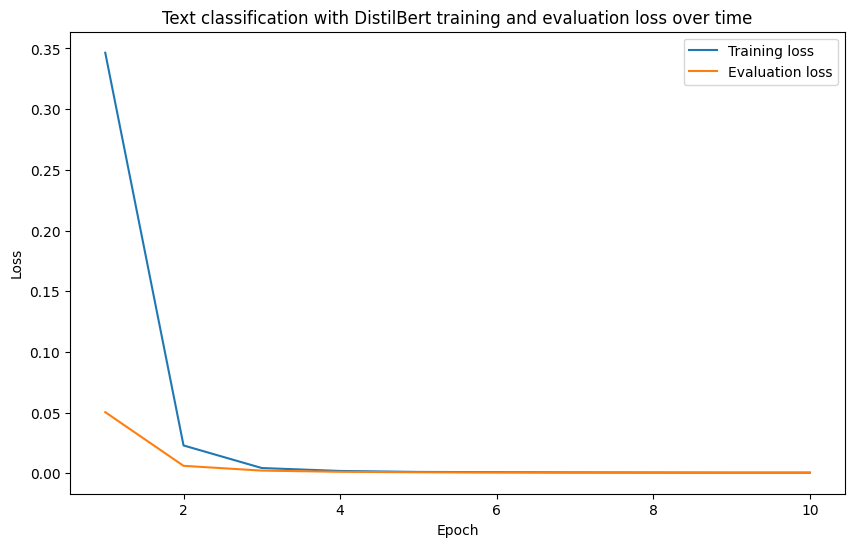

In [ ]:
# Plot training and evaluation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(trainer_history_training_df["epoch"], trainer_history_training_df["loss"], label="Training loss")
plt.plot(trainer_history_eval_df["epoch"], trainer_history_eval_df["eval_loss"], label="Evaluation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Text classification with DistilBert training and evaluation loss over time")
plt.legend()
plt.show()

## 6.8 Pushing our model to the Hugging Face Hub

In [ ]:
# Save our model to the Hugging Face Hub
# This will be public, since we set hub_private_repo=False in our TrainingArguments
model_upload_url = trainer.push_to_hub(
    commit_message="Uploading food not food text classifier model",
    # token="YOUR_HF_TOKEN_HERE" # This will default to the token you have saved in your Hugging Face config
)
print(f"[INFO] Model successfully uploaded to Hugging Face Hub with at URL: {model_upload_url}")

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

[INFO] Model successfully uploaded to Hugging Face Hub with at URL: https://huggingface.co/HimanshuGoyal2004/learn_hf_food_not_food_text_classifier-distilbert-base-uncased/tree/main/


# 7. Making and evaluating predictions on the test data

Model trained, let's now evaluate it on the test data.

Or step 7 in our workflow:

1. ✅ Create and preprocess data.
2. ✅ Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. ✅ Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. ✅ Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. ✅ Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. ✅ Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

A reminder that the test data is data that our model has never seen before.

So it will be a good estimate of how our model will do in a production setting.

We can make predictions on the test dataset using [`transformers.Trainer.predict`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.predict).

And then we can get the prediction values with the `predictions` attribute and assosciated metrics with the `metrics` attribute.

In [ ]:
# Perform predictions on the test set
predictions_all = trainer.predict(tokenized_dataset["test"])
prediction_values = predictions_all.predictions
prediction_metrics = predictions_all.metrics

print(f"[INFO] Prediction metrics on the test data:")
prediction_metrics

[INFO] Prediction metrics on the test data:


{'test_loss': 0.0005420572706498206,
 'test_accuracy': 1.0,
 'test_runtime': 0.0906,
 'test_samples_per_second': 551.677,
 'test_steps_per_second': 22.067}

Looks like our model did an outstanding job!

And it was *very* quick too.

This is one of the benefits of using a smaller pretrained model and customizing it to your own dataset.

You can achieve outstanding results in a very quick time as well as have a model capable of performing thousands of predictions per second.

We can also calculate the accuracy by hand by comparing the prediction labels to the test labels.

To do so, we'll:

1. Calculate the prediction probabilities (though this is optional as we could skip straight to 2 and get the same results) by passing the `prediction_values` to [`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).
2. Find the index of the prediction value with the highest value (the index will be equivalent to the predicted label) using [`torch.argmax`](https://pytorch.org/docs/stable/generated/torch.argmax.html) (we could also use [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) here) to find the predicted labels.
3. Get the true labels from the test dataset using `dataset["test"]["label"]`.
4. Compare the predicted labels from 2 to the true labels from 3 using [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to find the accuracy.

In [ ]:
import torch
from sklearn.metrics import accuracy_score

# 1. Get prediction probabilities (this is optional, could get the same results with step 2 onwards)
pred_probs = torch.softmax(torch.tensor(prediction_values), dim=1)

# 2. Get the predicted labels
pred_labels = torch.argmax(pred_probs, dim=1)

# 3. Get the true labels
true_labels = dataset["test"]["label"]

# 4. Compare predicted labels to true get the test accuracy
test_accuracy = accuracy_score(y_true=true_labels,
                               y_pred=pred_labels)

print(f"[INFO] Test accuracy: {test_accuracy*100}%")

[INFO] Test accuracy: 100.0%


In [ ]:
# Make a DataFrame of test predictions
test_predictions_df = pd.DataFrame({
    "text": true_labels,
    "pred_label": pred_labels,
    "pred_prob": torch.max(pred_probs, dim=1).values
})

test_predictions_df.head()

,text,pred_label,pred_prob
0,1,1,0.999410
1,0,0,0.999555
2,1,1,0.999421
3,0,0,0.999575
4,0,0,0.999573


In [ ]:
# Show 10 examples with low prediction probability
test_predictions_df.sort_values("pred_prob", ascending=True).head(10)

,text,pred_label,pred_prob
40,1,1,0.999005
11,1,1,0.999293
0,1,1,0.999410
14,1,1,0.999413
42,1,1,0.999414
10,1,1,0.999414
37,1,1,0.999415
20,1,1,0.999415
26,1,1,0.999415
30,1,1,0.999416


# 8. Making and inspecting predictions on custom text data

We've seen how our model performs on the test dataset (quite well).

But how might we check its performance on our own custom data?

For example, text-based image captions from the wild.

Well, we've got two ways to load our model now too:

1. Load model locally from our computer (e.g. via `models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased`).
2. Load model from Hugging Face Hub (e.g. via `mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased`).

Either way of loading the model results in the same outcome: being able to make predictions on given data.

So how about we start by setting up our model paths for both local loading and loading from the Hugging Face Hub.

In [ ]:
# Setup local model path
local_model_path = "models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Note: Be sure to change "HimanshuGoyal2004" to your Hugging Face username
huggingface_model_path = "HimanshuGoyal2004/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

## 8.1 Discussing ways to make predictions (inference)

When we've loaded our trained model, because of the way we've set it up, there are two main ways to make predictions on custom data:

1. **Pipeline mode** using [`transformers.pipeline`](https://huggingface.co/docs/transformers/v4.42.0/en/main_classes/pipelines#pipelines) and passing it our target model, this allows us to preprocess custom data and make predictions in one step.
2. **PyTorch mode** using a combination of [`transformers.AutoTokenizer`](https://huggingface.co/docs/transformers/v4.42.0/en/model_doc/auto#transformers.AutoTokenizer) and [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/v4.42.0/en/model_doc/auto#transformers.AutoModelForSequenceClassification) and passing each our target model, this requires us to preprocess our data before passing to a model, however, it offers the most customization.

Each method supports:

1. Predictions one at a time (batch size of 1), for example, one person using the app at a time.
2. Batches of predictions at a time (predictions with a batch size of `n` where `n` can be any number, e.g. `8`, `16`, `32`), for example, many people using a service simultaneously such as a voice chat and needing to filter comments (predicting on batches of size `n` is usually much faster than batches of 1).

Whichever method we choose, we'll have to set the target device we'd like the operations to happen on.

In general, it's best to make predictions on the most powerful accelerator you have available.

And in most cases that will be a NVIDIA GPU > Mac GPU > CPU.

So let's write a small function to pick the target device for us in that order.

**Note:-** Making predictions is also referred to as **inference**.

Because the model is going to *infer* on some data what the output should be.

Inference is often faster than training on a per sample basis as no model weights are updated (less computation).

However, inference can use more compute than training over the long run because you could train a model once over a few hours (or days or longer) and then use it for inference for several months (or longer), millions of times (or more).

In [ ]:
def set_device():
    """
    Set device to CUDA if available, else MPS (Mac), else CPU.

    This defaults to using the best available device (usually).
    """
    if torch.cuda.is_available():
        device = torch.device("cuda")
    elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
        device = torch.device("mps")
    else:
        device = torch.device("cpu")
    return device

DEVICE = set_device()
print(f"[INFO] Using device: {DEVICE}")

[INFO] Using device: cuda


## 8.2 Making predictions with pipeline

The [`transformers.pipeline`](https://huggingface.co/docs/transformers/v4.42.0/en/main_classes/pipelines#transformers.pipeline) method creates a machine learning pipeline.

Data goes in one end and predictions come out the other end.

You can create pipelines for many different tasks, such as, text classification, image classification, object detection, text generation and more.

Let's see how we can create a pipeline for our text classification model.

To do so we'll:

1. Instantiate an instance of `transformers.pipeline`.
2. Pass in the `task` parameter of `text-classification` (we can do this because our model is already formatted for text classification thanks to using `transformers.AutoModelForSequenceClassification`).
3. Setup the `model` parameter to be `local_model_path` (though we could also use `huggingface_model_path`).
4. Set the target device using the `device` parameter.
5. Set `top_k=1` to get to the top prediction back (e.g. either `"food"` or `"not_food"`, could set this higher to get more labels back).
6. Set the `BATCH_SIZE=32` so we can pass to the `batch_size` parameter. This will allow our model to make predictions on up to `32` samples at a time. Predicting on batches of data is usually much faster than single samples at a time, however, this often saturates at a point (e.g. predicting on batches of size 64 may be the same speed as 32 due to memory contraints).

In [ ]:
import torch
from transformers import pipeline

# Set the batch size for predictions
BATCH_SIZE = 32

# Create an instance of transformers.pipeline
food_not_food_classifier = pipeline(task="text-classification",
                                    model=local_model_path,
                                    device=DEVICE,
                                    top_k=1,
                                    batch_size=BATCH_SIZE)

food_not_food_classifier

Device set to use cuda


In [ ]:
# Test our trained model on some example text
sample_text_food = "A delicious photo of a plate of scrambled eggs, bacon and toast"
food_not_food_classifier(sample_text_food)

[[{'label': 'food', 'score': 0.9992825388908386}]]

In [ ]:
# Test the model on some more example text
sample_text_not_food = "A yellow tractor driving over the hill"
food_not_food_classifier(sample_text_not_food)

[[{'label': 'not_food', 'score': 0.9995613694190979}]]

In [ ]:
# Pass in random text to the model
food_not_food_classifier("cvnhertiejhwgdjshdfgh394587")

[[{'label': 'not_food', 'score': 0.9989323019981384}]]

In [ ]:
# Pipeline also works with remote models( will have to load the model locally first)
food_not_food_classifier_remote = pipeline(task="text-classification",
                                          model=huggingface_model_path,
                                          device=DEVICE,
                                          batch_size=BATCH_SIZE)

food_not_food_classifier_remote("This is some new text about bananas and pancakes and ice cream")

config.json:   0%|          | 0.00/681 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda


[{'label': 'food', 'score': 0.999076247215271}]

## 8.3 Making multiple predictions at the same time with batch prediction

We can make predictions with our model one at a time but it's often much faster to do them in batches.

To make predictions in batches, we can set up our `transformers.pipeline` instance with the `batch_size` parameter greater than `1`.

Then we'll be able to pass multiple samples at once in the form of a Python list.

In [ ]:
# Create batch size (we don't need to do this again but we're doing it for clarity)
BATCH_SIZE = 32

# Setup pipeline to handle batches
food_not_food_classifier = pipeline(task="text-classification",
                                    model=local_model_path,
                                    batch_size=BATCH_SIZE,
                                    device=DEVICE)

Device set to use cuda


In [ ]:
# Create a list of sentences to make predictions on
sentences = [
    "I whipped up a fresh batch of code, but it seems to have a syntax error.",
    "We need to marinate these ideas overnight before presenting them to the client.",
    "The new software is definitely a spicy upgrade, taking some time to get used to.",
    "Her social media post was the perfect recipe for a viral sensation.",
    "He served up a rebuttal full of facts, leaving his opponent speechless.",
    "The team needs to simmer down a bit before tackling the next challenge.",
    "The presentation was a delicious blend of humor and information, keeping the audience engaged.",
    "A beautiful array of fake wax foods (shokuhin sampuru) in the front of a Japanese restaurant.",
    "Daniel Bourke is really cool :D",
    "My favoruite food is biltong!"
]

food_not_food_classifier(sentences)

[{'label': 'not_food', 'score': 0.9989297986030579},
 {'label': 'not_food', 'score': 0.9990906715393066},
 {'label': 'not_food', 'score': 0.999234676361084},
 {'label': 'not_food', 'score': 0.999114453792572},
 {'label': 'not_food', 'score': 0.9991165995597839},
 {'label': 'not_food', 'score': 0.9993009567260742},
 {'label': 'not_food', 'score': 0.9987230896949768},
 {'label': 'food', 'score': 0.9967984557151794},
 {'label': 'not_food', 'score': 0.9994437098503113},
 {'label': 'not_food', 'score': 0.9990047812461853}]

## 8.4 Time our model across larger sample sizes

We can *say* that our model is fast or that making predictions in batches is faster than one at a time.

But how about we run some tests to confirm this?

Let's start by making predictions one at a time across 100 sentences (10x our `sentences` list) and then we'll write some code to make predictions in batches.

We'll time each and see how they go.

In [ ]:
import time

# Create 1000 sentences
sentences_1000 = sentences * 100

# Time how long it takes to make predictions on all sentences(one at a time)
print(f"[INFO] Number of sentences: {len(sentences_1000)}")
start_time_one_at_a_time = time.time()
for sentence in sentences_1000:
  # Make a prediction on each sentence one at a time
  food_not_food_classifier(sentence)
end_time_one_at_a_time = time.time()

print(f"[INFO] Time taken for one at a time prediction: {end_time_one_at_a_time - start_time_one_at_a_time} seconds")
print(f"[INFO] Avg inference time per sentence: {(end_time_one_at_a_time - start_time_one_at_a_time) / len(sentences_1000)} seconds")

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


[INFO] Number of sentences: 1000
[INFO] Time taken for one at a time prediction: 5.165236711502075 seconds
[INFO] Avg inference time per sentence: 0.005165236711502075 seconds


In [ ]:
for i in [10, 100, 10_000]:
  sentences_big = sentences * i
  print(f"[INFO] Number of sentences: {len(sentences_big)}")

  start_time = time.time()
  # Predict on all sentences in batches
  food_not_food_classifier(sentences_big)
  end_time = time.time()
  print(f"[INFO] Inference time for {len(sentences_big)} sentences: {round(end_time - start_time, 5)} seconds.")
  print(f"[INFO] Avg inference time per sentence: {round((end_time - start_time) / len(sentences_big), 8)} seconds.")
  print()

[INFO] Number of sentences: 100
[INFO] Inference time for 100 sentences: 0.0804 seconds.
[INFO] Avg inference time per sentence: 0.00080396 seconds.

[INFO] Number of sentences: 1000
[INFO] Inference time for 1000 sentences: 0.80696 seconds.
[INFO] Avg inference time per sentence: 0.00080696 seconds.

[INFO] Number of sentences: 100000
[INFO] Inference time for 100000 sentences: 87.58478 seconds.
[INFO] Avg inference time per sentence: 0.00087585 seconds.



## 8.5 Making predictions with PyTorch

We've seen how to make predictions/perform inference with `transformers.pipeline`, now let's see how to do the same with PyTorch.

Performing predictions with PyTorch requires an extra step compared to `pipeline`, we have to prepare our inputs first (turn the text into numbers).

Good news is, we can prepare our inputs with the tokenizer that got automatically saved with our model.

And since we've already trained a model and uploaded it to the Hugging Face Hub, we can load our model and tokenizer with `transformers.AutoTokenizer` and `transformers.AutoModelForSequenceClassification` passing it the saved path we used (mine is `mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased`).

Let's start by loading the tokenizer and see what it looks like to tokenize a piece of sample text.

In [ ]:
from transformers import AutoModelForKeypointDetection

# Setup model path (can be local or on Hugging Face)
model_path = "HimanshuGoyal2004/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Create an example to predict on
sample_text_food = "A delicious photo of a plate of scrambled eggs, bacon and toast"

# Prepare the tokenizer and tokenize the inputs
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_path)
inputs = tokenizer(sample_text_food,
                   return_tensors="pt") # return the output as PyTorch tensors

inputs

{'input_ids': tensor([[  101,  1037, 12090,  6302,  1997,  1037,  5127,  1997, 13501,  6763,
          1010, 11611,  1998, 15174,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

We get a dictionary of `input_ids` (our text in token form) and `attention_mask` (tells the model which tokens to pay attention to, `1` = pay attention, `0` = no attention).

Now we can load the model with the same path.

In [ ]:
from transformers import AutoModelForSequenceClassification

# Load our text classification model
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_path)

In [ ]:
import torch

with torch.no_grad():
  outputs = model(**inputs) # '**' means input all of the dictionary keys as arguments to the function
  # outputs = model(input_ids=inputs["input_ids"],
  #                 attention_mask=inputs["attention_mask"]) # same as above, but explicitly passing in the keys

outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-3.3205,  3.9186]]), hidden_states=None, attentions=None)

In [ ]:
# Get predicted class and prediction probability
predicted_class_id = outputs.logits.argmax().item()
prediction_probability = torch.softmax(outputs.logits, dim=1).max().item()

print(f"Text: {sample_text_food}")
print(f"Predicted label: {model.config.id2label[predicted_class_id]}")
print(f"Prediction probability: {prediction_probability}")

Text: A delicious photo of a plate of scrambled eggs, bacon and toast
Predicted label: food
Prediction probability: 0.9992825388908386


In [ ]:
import torch

from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_path)
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_path)

# Make sample text and tokenize it
sample_text = "A photo of a broccoli, salmon, rice and radish dish"
inputs = tokenizer(sample_text, return_tensors="pt")

# Make a prediction
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted class and prediction probability
output_logits = outputs.logits
predicted_class_id = torch.argmax(output_logits, dim=1).item()
predicted_class_label = model.config.id2label[predicted_class_id]
predicted_probability = torch.softmax(output_logits, dim=1).max().item()

# Print outputs
print(f"Text: {sample_text}")
print(f"Predicted class: {predicted_class_label} (prob: {predicted_probability * 100:.2f}%)")

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Text: A photo of a broccoli, salmon, rice and radish dish
Predicted class: food (prob: 99.94%)


# 9. Putting it all together

Ok, ok, we've covered a lot of ground going from dataset to trained model to making predictions on custom samples.

How about we put all of the steps we've covered so far together in a single code cell (or two)?

To do so, we'll:

1. Import necessary packages (e.g. `datasets`, `transformers.pipeline`, `torch` and more).
2. Setup variables for model training and saving pipeline such as our model name, save directory and dataset name.
3. Create a directory for saving models.
4. Load and preprocess the dataset from Hugging Face Hub using `datasets.load_dataset`.
5. Import a tokenizer with `transformers.AutoTokenizer` and map it to our dataset with `dataset.map`.
6. Set up an evaluation metric with `evaluate` & create a function to evaluate our model's predictions.
7. Import a model with `transformers.AutoModelForSequenceClassification` and prepare it for training with `transformers.TrainingArguments` and `transformers.Trainer`.
8. Train the model on our text dataset by calling `transformers.Trainer.train`.
9. Save the trained model to a local directory.
10. Push the model to the Hugging Face Hub.
11. Evaluate the model on the test data.
12. Test the trained model on a custom sample using `transformers.pipeline` to make sure it works.

In [ ]:
# 1. Import necessary packages
import pprint
from pathlib import Path

import numpy as np
import torch

import datasets
import evaluate

from transformers import pipeline
from transformers import TrainingArguments, Trainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 2. Setup Variables for model training and saving pipeline
DATASET_NAME = "mrdbourke/learn_hf_food_not_food_image_captions"
MODEL_NAME = "distilbert/distilbert-base-uncased"
MODEL_SAVE_DIR_NAME = "models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# 3. Create a directory for saving models
# Note: This will override our existing model (if there is one)
print(f"[INFO] Creating directory for saving models: {MODEL_SAVE_DIR_NAME}")
model_save_dir = Path(MODEL_SAVE_DIR_NAME)
model_save_dir.mkdir(parents=True, exist_ok=True)

# 4. Load and preprocess the dataset from Hugging Face Hub
print(f"[INFO] Downloading dataset from Hugging Face Hub, name: {DATASET_NAME}")
dataset = datasets.load_dataset(path=DATASET_NAME)

# Create mappings from id2label and label2id
id2label = {0: "not_food", 1: "food"}
label2id = {"not_food": 0, "food": 1}

# Create function to map IDs to labels in dataset
def map_labels_to_number(example):
  example["label"] = label2id[example["label"]]
  return example

# Map preprocessing function to dataset
dataset = dataset["train"].map(map_labels_to_number)

# Split the dataset into train/test sets
dataset = dataset.train_test_split(test_size=0.2, seed=42)

# 5. Import a tokenizer and map it to our dataset
print(f"[INFO] Tokenizing text for model training with tokenizer: {MODEL_NAME}")
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=MODEL_NAME,
                                          use_fast=True)

# Create a preprocessing function to tokenize text
def tokenize_text(examples):
  return tokenizer(examples["text"],
                   padding=True,
                   truncation=True)

tokenized_dataset = dataset.map(function=tokenize_text,
                                batched=True,
                                batch_size=1000)

# 6. Set up an evaluation metric & function to evaluate our model
accuracy_metric = evaluate.load("accuracy")

def compute_accuracy(predictions_and_labels):
  predictions, labels = predictions_and_labels

  if len(predictions.shape) >= 2:
    predictions = np.argmax(predictions, axis = 1)

  return accuracy_metric.compute(predictions=predictions, references=labels)

# 7. Import a model and prepare it for training
print(f"[INFO] Loading model: {MODEL_NAME}")
model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path=MODEL_NAME,
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)
print(f"[INFO] Model loading complete!")

# Setup TrainingArguments
training_args = TrainingArguments(
    output_dir=model_save_dir,
    learning_rate=0.0001,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    save_strategy="epoch",
    eval_strategy="epoch",
    save_total_limit=3,
    use_cpu=False,
    seed=42,
    load_best_model_at_end=True,
    logging_strategy="epoch",
    report_to="none",
    push_to_hub=False,
    hub_private_repo=False
)

# Create Trainer instance and train model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_accuracy
)

# 8. Train the model on our text dataset
print(f"[INFO] Commencing model training....")
results = trainer.train()

# 9. Save the trained model
print(f"[INFO] Model training complete, saving model to local path: {model_save_dir}")
trainer.save_model(output_dir=model_save_dir)

# 10. Push the model to the Hugging Face Hub
print(f"[INFO] Uploading model to Hugging Face Hub...")
model_upload_url = trainer.push_to_hub(
    commit_message="Uploading food not food text classifier model",
    # token="YOUR_HF_TOKEN_HERE" # requires a "write" HF token
)
print(f"[INFO] Model upload complete, model available at: {model_upload_url}")

# 11. Evaluate the model on the test data
print(f"[INFO] Performing evaluation on test dataset...")
predictions_all = trainer.predict(tokenized_dataset["test"])
prediction_values = predictions_all.predictions
prediction_metrics = predictions_all.metrics

print(f"[INFO] Prediction metrics on the test data:")
pprint.pprint(prediction_metrics)

[INFO] Creating directory for saving models: models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased
[INFO] Downloading dataset from Hugging Face Hub, name: mrdbourke/learn_hf_food_not_food_image_captions
[INFO] Tokenizing text for model training with tokenizer: distilbert/distilbert-base-uncased


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

[INFO] Loading model: distilbert/distilbert-base-uncased


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-74-57913721fa1b>:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


[INFO] Model loading complete!
[INFO] Commencing model training....


Epoch,Training Loss,Validation Loss,Accuracy
1,0.429700,0.095491,1.000000
2,0.054200,0.008327,1.000000
3,0.005900,0.002454,1.000000
4,0.002100,0.001236,1.000000
5,0.001200,0.000830,1.000000
6,0.000900,0.000657,1.000000
7,0.000700,0.000570,1.000000
8,0.000600,0.000526,1.000000
9,0.000600,0.000503,1.000000
10,0.000600,0.000495,1.000000


[INFO] Model training complete, saving model to local path: models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased
[INFO] Uploading model to Hugging Face Hub...


training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

[INFO] Model upload complete, model available at: https://huggingface.co/HimanshuGoyal2004/learn_hf_food_not_food_text_classifier-distilbert-base-uncased/tree/main/
[INFO] Performing evaluation on test dataset...


[INFO] Prediction metrics on the test data:
{'test_accuracy': 1.0,
 'test_loss': 0.0004950410220772028,
 'test_runtime': 0.0879,
 'test_samples_per_second': 568.792,
 'test_steps_per_second': 22.752}


In [ ]:
# 12. Make sure the model works by testing it on a custom sample
food_not_food_classifier = pipeline(task="text-classification",
                                    model=model_save_dir, # can also use model on Hugging Face Hub path
                                    device=torch.device("cuda") if torch.cuda.is_available() else "cpu",
                                    top_k=1,
                                    batch_size=32)

food_not_food_classifier("Yo! We just built a food not food sentence classifier model! Good news is, it can be replicated for other kinds of text classification!")

Device set to use cuda


[[{'label': 'not_food', 'score': 0.996206521987915}]]

# 10. Turning our model into a demo

Once you've trained and saved a model, one of the best ways to continue to test it and show/share it with others is to create a demo.

Or step number 8 in our workflow:

1. ✅ Create and preprocess data.
2. ✅ Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. ✅ Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. ✅ Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. ✅ Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. ✅ Save the model (to our local machine or to the Hugging Face Hub).
7. ✅ Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

A demo is a small application with the focus of showing the workflow of your model from data in to data out.

It's also one way to start testing your model in the wild.

You may know where it works and where it doesn't but chances are someone out there will find a new bug before you do.

To build our demo, we're going to use an open-source library called [Gradio](https://www.gradio.app/guides/quickstart).

Gradio allows you to make machine learning demo apps with Python code and best of all, it's part of the Hugging Face ecosystem so you can share your demo to the public directly through Hugging Face.

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/06-gradio-workflow-for-ml-demos.png"
     alt="Diagram illustrating the workflow for creating machine learning demos using Gradio. The process starts with data from datasets, which is fed into a model built using Transformers. The model is then used to create a demo hosted on Hub/Spaces/Gradio. The Gradio interface helps visualize the workflow, with inputs such as 'A photo of sushi rolls on a white plate' and 'A yellow tractor driving over a grassy hill'. These inputs are processed by the model to produce outputs classified as 'Food' or 'Not Food'. This setup demonstrates how Gradio facilitates the creation of interactive ML demos."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Going on the premise of data, model, demo, Gradio helps to create the demo. Once you've got a trained model on the Hugging Face Hub, you can setup a Gradio interface to import that model and interact it with it. Gradio interfaces can be deployed on Hugging Face Spaces and shared with others so they can try your model too.</figcaption>
</figure>

Gradio works on the premise of input -> function (this could be a model) -> output.

In our case:

* Input = A string of text.
* Function = Our trained text classification model.
* Output = Predicted output of food/not_food with prediction probability.

## 10.1 Creating a simple function to perform inference

Let's create a function to take an input of text, process it with our model and return a dictionary of the predicted labels.

Our function will:

1. Take an input of a string of text.
2. Setup a text classification pipeline using `transformers.pipeline` as well as our trained model (this can be from our local machine or loaded from Hugging Face). We'll return all the probabilities from the output using `top_k=None`.
3. Get the outputs of the text classification pipeline from 2 as a list of dictionaries (e.g. `[{'label': 'food', 'score': 0.999105}, {'label': 'not_food', 'score': 0.00089}]`).
4. Format and return the list of dictionaries from 3 to be compatible with Gradio's [`gr.Label`](https://www.gradio.app/docs/gradio/label) output (we'll see this later) which requires a dictionary in the form `[{"label_1": probability_1, "label_2": probability_2}]`.

Onward!

In [ ]:
from typing import Dict

# 1. Create a function which takes text as input
def food_not_food_classifier(text: str) -> Dict[str, float]:
    """
    Takes an input string of text and classifies it into food/not_food in the form of a dictionary.
    """

    # 2. Setup the pipeline to use the local model (or Hugging Face model path)
    food_not_food_classifier = pipeline(task="text-classification",
                                        model=local_model_path,
                                        batch_size=32,
                                        device="cuda" if torch.cuda.is_available() else "cpu", # set the device to work in any environment
                                        top_k=None) # return all possible scores (not just top-1)

    # 3. Get outputs from pipeline (as a list of dicts)
    outputs = food_not_food_classifier(text)[0]

    # 4. Format output for Gradio (e.g. {"label_1": probability_1, "label_2": probability_2})
    output_dict = {}
    for item in outputs:
        output_dict[item["label"]] = item["score"]

    return output_dict

# Test out the function
food_not_food_classifier("My lunch today was chicken and salad")

Device set to use cuda


{'food': 0.9991474151611328, 'not_food': 0.0008525520097464323}

## 10.2 Building a small Gradio demo to run locally

We've got a working function to go from text to predicted labels and probabilities.

Let's now build a Gradio interface to showcase our model.

We can do so by:

1. Importing Gradio (using `import gradio as gr`).
2. Creating an instance of [`gr.Interface`](https://www.gradio.app/docs/gradio/interface) with parameters `inputs="text"` (for our text-based inputs) called `demo` and `outputs=gr.Label(num_top_classes=2)` to display our output dictionary. We can also add some descriptive aspects to our `demo` with the `title`, `description` and `examples` parameters.
3. Running/launching the demo with [`gr.Interface.launch()`](https://www.gradio.app/docs/gradio/interface#interface-launch).


In [ ]:
# 1. Import Gradio as the common alias "gr"
import gradio as gr

# 2. Setup a Gradio interface to accept text and output labels
demo = gr.Interface(
    fn=food_not_food_classifier,
    inputs="text",
    outputs=gr.Label(num_top_classes=2),
    title="Food or Not Food Classifier",
    description="A text classifier to determine if a sentence is about food or not food.",
    examples=[["I whipped up a fresh batch of code, but it seems to have a syntax error."],
              ["A delicious photo of a plate of scrambled eggs, bacon and toast."]])

# 3. Launch the interface
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://699b8beb2a5b5de86a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 11. Making our demo publicly accessible

One of the best ways to share your machine learning work is by creating an application.

And one of the best places to share your applications is [Hugging Face Spaces](https://huggingface.co/docs/hub/spaces).

Hugging Face Spaces allows you to host machine learning (and non-machine learning) applications for free (with [optional paid hardware upgrades](https://huggingface.co/docs/hub/spaces-overview#hardware-resources)).

If you're familiar with GitHub, Hugging Face Spaces works similar to a GitHub repository (each Space is a Git repository itself).

If not, that's okay, think of Hugging Face Spaces as an online folder where you can upload your files and have them accessed by others.

Creating a Hugging Face Space can be done in two main ways:

1. **Manually** - By going to the [Hugging Face Spaces](https://huggingface.co/spaces) website and clicking "Create new space". Or by going directly to [https://www.huggingface.co/new-space](https://huggingface.co/new-space). Here, you'll be able to setup a few settings for your Space and choose the framework/runtime (e.g. Streamlit, Gradio, Docker and more).
2. **Programmatically** - By using the [Hugging Face Hub Python API](https://huggingface.co/docs/huggingface_hub/package_reference/hf_api) we can write code to [directly upload files to the Hugging Face Hub](https://www.gradio.app/guides/using-hugging-face-integrations#hosting-your-gradio-demos-on-spaces), including Hugging Face Spaces.

Both are great options but we're going to take the second approach.

This is so we can create our Hugging Face Space right from this notebook.

To do so, we'll create three files:

1. `app.py` - This will be the Python file which will be the main running file on our Hugging Face Space. Inside we'll include all the code necessary to run our Gradio demo (as above). Hugging Face Spaces will automatically recoginize the `app.py` file and run it for us.
2. `requirements.txt` - This text file will include all of the Python packages we need to run our `app.py` file. Before our Space starts to run, all of the packages in this file will be installed.
3. `README.md` - This markdown file will include details about our Space as well as specific Space-related metadata (we'll see this later on).

We'll create these files with the following file structure:

```
demos/
└── food_not_food_text_classifier/
    ├── app.py
    ├── README.md
    └── requirements.txt
```

Why this way?

Doing it in the above style means we'll have a directory which contains all of our demos (`demos/`) as well as a dedicated directory which contains our `food`/`not_food` demo application (`food_not_food_text_classifier/`).

This way, we'll be able to upload the whole `demos/food_not_food_text_classifier/` folder to Hugging Face Spaces.


In [ ]:
from pathlib import Path

# Make a directory for demos
demos_dir = Path("../demos")
demos_dir.mkdir(exist_ok=True)

# Create a folder for the food_not_food_text_classifer demo
food_not_food_text_classifier_demo_dir = Path(demos_dir, "food_not_food_text_classifier")
food_not_food_text_classifier_demo_dir.mkdir(exist_ok=True)

## 11.1 Making an app file

Our `app.py` file will be the main part of our Hugging Face Space.

The good news is, we've already created most of it when we created our original demo.

Inside the `app.py` folder we'll:

1. Import the required libraries/packages for running our demo app.
2. Setup a function for going from text to our trained model's predicted outputs. And because our model is already hosted on the Hugging Face Hub, we can pass `pipeline` our model's name (e.g. `HimanshuGoyal2004/learn_hf_food_not_food_text_classifier-distilbert-base-uncased`) and when we upload our `app.py` file to Hugging Face Spaces, it will load the model directly from the Hub.
    * **Note:** Be sure to change "`HimanshuGoyal2004`" to your own Hugging Face username.
3. Create a demo just as before with `gr.Interface`.
4. Launch our demo with `gr.Interface.launch`.

We can write all of the above in a notebook cell.

And we can turn it into a file by using the [`%%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile) magic command and passing it our target filepath.

In [ ]:
%%writefile ../demos/food_not_food_text_classifier/app.py
# 1. Import the required packages
import torch
import gradio as gr

from typing import Dict
from transformers import pipeline

# 2. Define function to use our model on given text
def food_not_food_classifier(text: str) -> Dict[str, float]:
    # Set up text classification pipeline
    food_not_food_classifier = pipeline(task="text-classification",
                                      # Because our model is on Hugging Face already, we can pass in the model name directly
                                      model="HimanshuGoyal2004/learn_hf_food_not_food_text_classifier-distilbert-base-uncased",
                                      device="cuda" if torch.cuda.is_available() else "cpu",
                                      top_k=None)

    # Get outputs from pipeline (as a list of dicts)
    outputs = food_not_food_classifier(text)[0]

    # Format output for Gradio (e.g. {"label_1": probability_1, "label_2": probability_2})
    output_dict = {}
    for item in outputs:
        output_dict[item["label"]] = item["score"]

    return output_dict

# 3. Create a Gradio interface with details about our app
description = """
A text classifier to determine if a sentence is about food or not food.

Fine-tuned from [DistilBERT](https://huggingface.co/distilbert/distilbert-base-uncased) on
a [small dataset of food and not food text](https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions).
"""

demo = gr.Interface(fn=food_not_food_classifier,
             inputs="text",
             outputs=gr.Label(num_top_classes=2),
             title="🍗🚫🥑 Food or Not Food Text Classifier",
             description=description,
             examples=[["I whipped up a fresh batch of code, but it seems to have a syntax error."],
                       ["A delicious photo of a plate of scrambled eggs, bacon and toast."]])

# 4. Launch the interface
if __name__ == "__main__":
    demo.launch()

Writing ../demos/food_not_food_text_classifier/app.py


## 11.2 Making a requirements file

When you upload an `app.py` file to Hugging Face Spaces, it will attempt to run it automatically.

And just like running the file locally, we need to make sure all of the required packages are available.

Otherwise our Space will produce an error like the following:

```
===== Application Startup at 2024-06-13 05:37:21 =====

Traceback (most recent call last):
  File "/home/user/app/app.py", line 1, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'
```

Good news is, our demo only has three requirements: `gradio`, `torch`, `transformers`.

Let's create a `requirements.txt` file with the packages we need and save it to the same directory as our `app.py` file.

In [ ]:
%%writefile ../demos/food_not_food_text_classifier/requirements.txt
gradio
torch
transformers

Writing ../demos/food_not_food_text_classifier/requirements.txt


## 11.4 Making a README file

Our `app.py` can contain information about our demo, however, we can also use a `README.md` file to further communicate our work.

We can include anything in [markdown-style text](https://huggingface.co/docs/hub/en/spaces-config-reference) in the `README.md` file.

However, Spaces also have a special [YAML block](https://simple.wikipedia.org/wiki/YAML) at the top of the `README.md` file in the root directory with configuration details.

Inside the YAML block you can put special metadata details about your Space including:

* `title` - The title of your Space (e.g. `title: Food Not Food Text Classifier`).
* `emoji` - The emoji to display on your Space (e.g. `emoji: 🍗🚫🥑`).
* `app_file` - The target app file for Spaces to run (set to `app_file: app.py` by default).

And there are plenty more in the [Spaces Configuration References documentation](https://huggingface.co/docs/hub/en/spaces-config-reference).

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/08-huggingface-spaces-yaml-front-matter.png"
     alt="Screenshot of a README.md file on Hugging Face Spaces. The file includes YAML front matter and Markdown content. The YAML front matter specifies the title as 'Food Not Food Text Classifier', with other attributes such as emoji, colorFrom, colorTo, sdk (Gradio), sdk_version, app_file, pinned, and license. Below the YAML section, the Markdown content includes a header 'Food Not Food Text Classifier' and a description of the project, which is a small demo to showcase a text classifier determining if a sentence is about food or not. The classifier is based on a DistilBERT model fine-tuned on a small synthetic dataset of 250 generated food or not food image captions."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Example of Hugging Face Spaces README.md file with YAML front matter (front matter is another term for "things at the front/top of the file") for formatting the Space.</figcaption>
</figure>

Let's create a `README.md` file with a YAML block at the top detailing some of the metadata about our project.

In [ ]:
%%writefile ../demos/food_not_food_text_classifier/README.md
---
title: Food Not Food Text Classifier
emoji: 🍗🚫🥑
colorFrom: blue
colorTo: yellow
sdk: gradio
app_file: app.py
pinned: false
license: apache-2.0
---

# 🍗🚫🥑 Food Not Food Text Classifier

Small demo to showcase a text classifier to determine if a sentence is about food or not food.

DistillBERT model fine-tuned on a small synthetic dataset of 250 generated [Food or Not Food image captions](https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions).

[Source code notebook](https://github.com/banno-0720/learning_PyTorch/blob/main/hugging_face_text_classification.ipynb).

Writing ../demos/food_not_food_text_classifier/README.md


In [ ]:
!ls ../demos/food_not_food_text_classifier

app.py	README.md  requirements.txt


## 11.5 Uploading our demo to Hugging Face Spaces

We've created all of the files required for our demo, now for the fun part!

Let's upload them to Hugging Face Spaces.

To do so programmatically, we can use the [Hugging Face Hub Python API](https://huggingface.co/docs/huggingface_hub/en/package_reference/hf_api).

To get our demo hosted on Hugging Face Spaces we'll go through the following steps:

1. Import the required methods from the `huggingface_hub` package, including [`create_repo`](https://huggingface.co/docs/huggingface_hub/package_reference/hf_api#huggingface_hub.HfApi.create_repo), [`get_full_repo_name`](https://huggingface.co/docs/huggingface_hub/package_reference/hf_api#huggingface_hub.HfApi.get_full_repo_name), [`upload_file`](https://huggingface.co/docs/huggingface_hub/en/package_reference/hf_api#huggingface_hub.HfApi.upload_file) (optional, we'll be using `upload_folder`) and [`upload_folder`](https://huggingface.co/docs/huggingface_hub/en/package_reference/hf_api#huggingface_hub.HfApi.upload_folder).
2. Define the demo folder we'd like to upload as well as the different parameters for the Hugging Face Space such as repo type (`"space"`), our target Space name, the target Space SDK (`"gradio"`), our [Hugging Face token](https://huggingface.co/docs/hub/en/security-tokens) with write access (optional if it already isn't setup).
3. Create a repository on Hugging Face Spaces using the `huggingface_hub.create_repo` method and filling out the appropriate parameters.
4. Get the full name of our created repository using the `huggingface_hub.get_full_repo_name` method (we could hard code this but I like to get it programmatically incase things change).
5. Upload the contents of our target demo folder (`../demos/food_not_food_text_classifier/`) to Hugging Face Hub with [`huggingface_hub.upload_folder`](https://huggingface.co/docs/huggingface_hub/en/package_reference/hf_api#huggingface_hub.HfApi.upload_folder).
6. Hope it all works and inspect the results! 🤞

In [ ]:
# 1. Import the required methods for uploading to the Hugging Face Hub
from huggingface_hub import (
    create_repo,
    get_full_repo_name,
    upload_file, # for uploading a single file (if necessary)
    upload_folder # for uploading multiple files (in a folder)
)

# 2. Define the parameters we'd like to use for the upload
LOCAL_DEMO_FOLDER_PATH_TO_UPLOAD = "../demos/food_not_food_text_classifier"
HF_TARGET_SPACE_NAME = "learn_hf_food_not_food_text_classifier_demo"
HF_REPO_TYPE = "space" # we're creating a Hugging Face Space
HF_SPACE_SDK = "gradio"
HF_TOKEN = ""

# 3. Create a Space repository on Hugging Face Hub
print(f"[INFO] Creating repo on Hugging Face Hub with name: {HF_TARGET_SPACE_NAME}")
create_repo(
    repo_id=HF_TARGET_SPACE_NAME,
    # token=HF_TOKEN,
    repo_type=HF_REPO_TYPE,
    private=False,
    space_sdk=HF_SPACE_SDK,
    exist_ok=True,
)

# 4. Get the full repository name (e.g. {username}/{model_id} or {username}/{space_name})
full_hf_repo_name = get_full_repo_name(model_id=HF_TARGET_SPACE_NAME)
print(f"[INFO] Full Hugging Face Hub repo name: {full_hf_repo_name}")

# 5. Upload our demo folder
print(f"[INFO] Uploading {LOCAL_DEMO_FOLDER_PATH_TO_UPLOAD} to repo: {full_hf_repo_name}")
folder_upload_url = upload_folder(
    repo_id=full_hf_repo_name,
    folder_path=LOCAL_DEMO_FOLDER_PATH_TO_UPLOAD,
    path_in_repo=".", # upload our folder to the root directory ("." means "base" or "root", this is the default)
    # token=HF_TOKEN, # optional: set token manually
    repo_type=HF_REPO_TYPE,
    commit_message="Uploading food not food text classifier demo app.py"
)
print(f"[INFO] Demo folder successfully uploaded with commit URL: {folder_upload_url}")

[INFO] Creating repo on Hugging Face Hub with name: learn_hf_food_not_food_text_classifier_demo
[INFO] Full Hugging Face Hub repo name: HimanshuGoyal2004/learn_hf_food_not_food_text_classifier_demo
[INFO] Uploading ../demos/food_not_food_text_classifier to repo: HimanshuGoyal2004/learn_hf_food_not_food_text_classifier_demo
[INFO] Demo folder successfully uploaded with commit URL: https://huggingface.co/spaces/HimanshuGoyal2004/learn_hf_food_not_food_text_classifier_demo/tree/main/.


## 11.6 Testing our hosted demo

One of the really cool things about Hugging Face Spaces is that we can share our demo application as a link so others can try it out.

We can also embed it right into our notebook.

To do so, we can go to the three dots in the top right of our [hosted Space](https://huggingface.co/spaces/HimanshuGoyal2004/learn_hf_food_not_food_text_classifier_demo) and select "Embed this Space".

We then have the option to embed our Space using a JavaScript web component, HTML `iframe` or via the direct URL.

Since Jupyter notebooks have the ability to render HTML via [`IPython.display.HTML`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.HTML), let's embed our Space with HTML.

In [ ]:
from IPython.display import HTML


# You can get embeddable HTML code for your demo by clicking the "Embed" button on the demo page
HTML(data='''
<iframe
	src="https://himanshugoyal2004-learn-hf-food-not-food-text-cl-c0f5849.hf.space"
	frameborder="0"
	width="850"
	height="450"
></iframe>
''')

# Summary

Here are some of the main takeaways from this project.

**The Hugging Face ecosystem is a collection of powerful and open-source tools for machine learning workflows.**

* Hugging Face `datasets` helps you to store and preprocess datasets of almost any shape and size.
* Hugging Face `transformers` has many built-in pretrained models for many different use cases and components such as `transformers.Trainer` help you to tailor those models to your own custom use cases.
* Hugging Face `tokenizers` works closely with `transformers` and allows the efficient conversion of raw text data into numerical representation (which is required for machine learning models).
* The Hugging Face Hub is a great place to share your models and machine learning projects. Over time, you can build up a portfolio of machine learning-based projects to show future employers or clients and to help the community grow.
* There are many more, but I'll leave these for you to explore as extra-curriculum.

**A common machine learning workflow: dataset -> model -> demo.**

Before a machine learning model is incorporated into a larger application, a very common workflow is to:

1. Find an existing or create a new dataset for your specific problem.
2. Train/fine-tune and evaluate an existing model on your dataset.
3. Create a small demo application to test your trained model.

We've just gone through all of these steps for text classification!

Text classification is a very common problem in many business settings. If you have a similar problem but a different dataset, you can replicate this workflow.

**Building your own model has several advantages over using APIs.**

APIs are very helpful to try something out.

However, depending on your use case, you may often want to create your own custom model.

Training your own model can often result in faster predictions and far less running costs over time.

The Hugging Face ecosystem enables the creation of custom models for almost any kind of machine learning problem.